<a href="https://colab.research.google.com/github/catherineHZN/DeepLearningTutorials/blob/main/TensorFlow/01_RegressionNN_in_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression with Neural networks in TensorFlow



In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.1


## Creating some data to view and fit

Here, we are using some synthetically created data. In normal applications, data come from a real-world information gathered from all sorts of places. This way the data actually describes the reality that we are trying to learn.

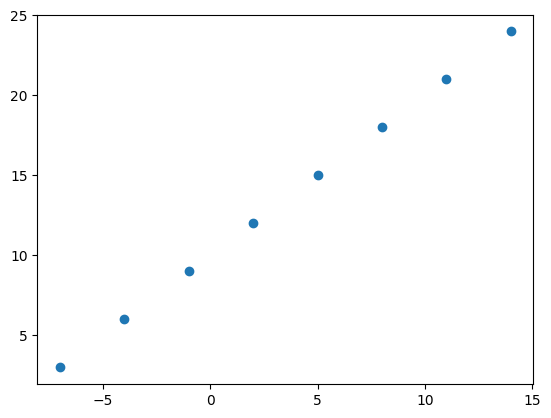

In [3]:
import numpy as np
# matplotlib.pyplot this library is required for plotting our data and the learned
# in a graph ...
import matplotlib.pyplot as plt

# Again,for the sake of learning the concept, we are generating a very small data set manually.
# In real life, this data should be much bugger, and acquired from some sort of real life information
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create the lables
y= np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visulaize our great dataset!! for this sake, we need the matplotlib.pyplot library
# plt.scatter will just plot the X and y as scttered dot on the axis.
plt.scatter(X,y)


In [4]:

# Actually y= X+10 ois the model that we are trying to learn!!
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
# Turn our NumPy array into tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape

(TensorShape([]), TensorShape([]))

# Steps in modeling with TensorFlow
##1. Creating the model:
1.1 Define the input and output layers

1.2 Define the hidden layers of the deep learning model.
##2. Compiling the model
2.1 Define the loss function (in other words, the function which tells our model how wrong it is) for example: SGD, Adam.

2.2 Define the optimizers (tells the model how to improve the patterns its learning)

2.3  Define the  evaluation metrics (what we can use to interpret the preformance of the model)

##3. Fitting the mode:

Letting the model try to find patterns between X and y.

In [23]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
   tf.keras.layers.Dense(1)
])

#2. Compile the model
# tf.keras.losses.mae is mean absolute error

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - loss: 9.7953 - mae: 9.7953
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 9.6628 - mae: 9.6628
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.5303 - mae: 9.5303
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.3978 - mae: 9.3978
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.2653 - mae: 9.2653
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.1328 - mae: 9.1328
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.0003 - mae: 9.0003
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.8678 - mae: 8.8678
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.7353 - mae: 8.7353
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.6028 - mae: 8.6028


In [18]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [24]:
# Try and predict using our model
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[24.04411]], dtype=float32)

## Improving our model
We can improve the model by altering the steps we took to create/compile/fit our model
### 1.**Creating a model**

1.1 Consider adding more layers

1.2 Increase the number of hiddwn layers

1.3 Change the activiation function in each layer.

###2.**Compiling the model**

2.1 Changing the learning rate of the optimization. **The learning rate** is one of the most common ways to improve the performance of the model. Try to tweek it first!

2.2 Changing the optimizer

##3.**Fitting the model**

3.1 Fit the model for more **epochs**

3.2 Feed the model with more data!!

In [45]:
# Creat/Compile and fit a larger model
# First expirement - changing the epoch number from 5 to 100

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),loss = tf.keras.losses.mae, metrics=["mae"])


# 3. fitting the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step - loss: 19.9717 - mae: 19.9717
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 19.6904 - mae: 19.6904
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 19.4092 - mae: 19.4092
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 19.1279 - mae: 19.1279
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 18.8467 - mae: 18.8467
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 18.5654 - mae: 18.5654
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 18.2842 - mae: 18.2842
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 18.0029 - mae: 18.0029
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 17.7217 - mae: 17.7217
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 17.4404 - mae: 17.4404
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 17.1592 - mae: 17.1592
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 16.8779 - mae: 16.8779
Epoch 13/100
1/1 ━━━━━━

In [44]:
model.predict(tf.expand_dims([11.0], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[21.48589]], dtype=float32)

In [54]:
# Let's see if we can change the model so we can improve the performance
# 1. Create the model archeticture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(1) ])

#2. Copmile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01) , loss = tf.keras.losses.mae, metrics=["mae"])


#3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs= 100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.3305 - mae: 13.3305
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 12.4172 - mae: 12.4172
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 11.5132 - mae: 11.5132
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 10.6168 - mae: 10.6168
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.7048 - mae: 9.7048
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.7762 - mae: 8.7762
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.8232 - mae: 7.8232
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 6.9640 - mae: 6.9640
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 6.1194 - mae: 6.1194
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 5.2444 - mae: 5.2444
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4.3311 - mae: 4.3311
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3.8196 - mae: 3.8196
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [56]:
model.predict(tf.expand_dims([17.0], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[27.614138]], dtype=float32)

## Evaluating the model